In [22]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt

Setup plotting sizes

In [23]:
matplotlib.rcParams['figure.figsize'] = [10, 5]

In [24]:
files = glob.glob( "project_data/daily-temperature*.csv")
daily_temps = pd.concat(pd.read_csv(f) for f in files)

In [25]:
daily_temps.columns = daily_temps.columns.str.lower()

In [26]:
daily_temps.head()

,region,country,state,city,month,day,year,avgtemperature
0,Europe,Albania,NaN,Tirana,1,1,1995,-99.0
1,Europe,Albania,NaN,Tirana,1,2,1995,-99.0
2,Europe,Albania,NaN,Tirana,1,3,1995,-99.0
3,Europe,Albania,NaN,Tirana,1,4,1995,-99.0
4,Europe,Albania,NaN,Tirana,1,5,1995,-99.0


The data looks like it has some temperature values at -99. Looking at the documentation these values are coded missing values.

<AxesSubplot:>

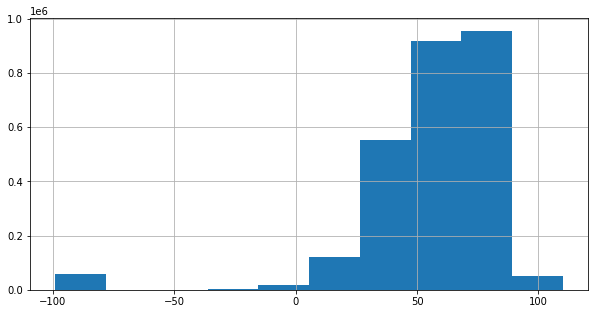

In [27]:
daily_temps.avgtemperature.hist()

It appears there are also some temperature records from before 1995 which is likely an error.

<AxesSubplot:>

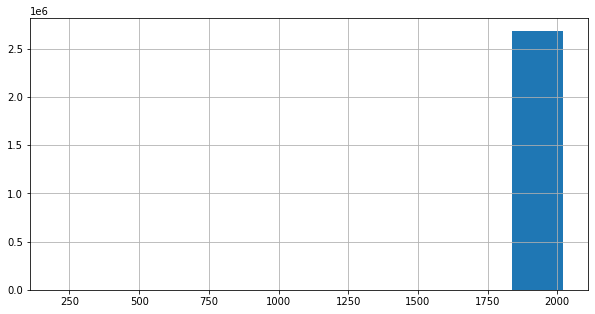

In [28]:
daily_temps.year.hist()

In [29]:
daily_temps.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  0])

Values outside of expected range:

In [30]:
print(daily_temps.year[daily_temps.year < 1995].unique())
print(daily_temps.avgtemperature[daily_temps.avgtemperature < -50].unique())
print(daily_temps.day[(daily_temps.day < 1) | (daily_temps.day > 31)].unique())

[200 201]
[-99.]
[0]


Replacing the values with proper missing values.

In [31]:
daily_temps.avgtemperature.replace(-99., None, inplace=True)
daily_temps.year.replace([200, 201], None, inplace=True)
# Change day 0 to 1
daily_temps.day.replace(0, 1, inplace=True)

In [32]:
daily_temps.loc[daily_temps.avgtemperature < -50 , "avgtemperature"] = None

Checking that all data is in the expected range:

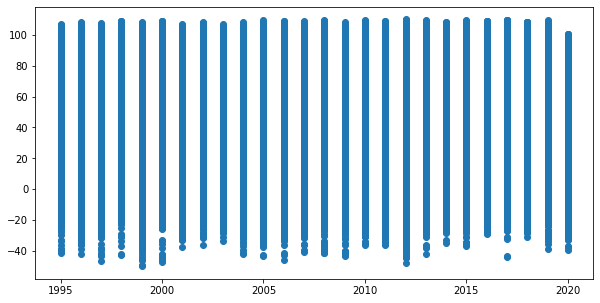

In [33]:
plt.scatter(x = daily_temps.year, y = daily_temps.avgtemperature)
plt.show()

The data is currently in farenheit and I would prefer to analyse it in celcius as it is easier to contextualise. Here I'm defining a function to convert the values and creating a new column with pandas.

In [34]:
def to_celcius(x):
    return (x - 32) * 5/9

In [35]:
daily_temps["avg_temp_c"] = to_celcius(daily_temps.avgtemperature)
daily_temps.head()

,region,country,state,city,month,day,year,avgtemperature,avg_temp_c
0,Europe,Albania,NaN,Tirana,1,1,1995,NaN,NaN
1,Europe,Albania,NaN,Tirana,1,2,1995,NaN,NaN
2,Europe,Albania,NaN,Tirana,1,3,1995,NaN,NaN
3,Europe,Albania,NaN,Tirana,1,4,1995,NaN,NaN
4,Europe,Albania,NaN,Tirana,1,5,1995,NaN,NaN


In [36]:
daily_temps['date'] =  pd.to_datetime(daily_temps[["year", "month", "day"]])
daily_temps.head()

,region,country,state,city,month,day,year,avgtemperature,avg_temp_c,date
0,Europe,Albania,NaN,Tirana,1,1,1995,NaN,NaN,1995-01-01
1,Europe,Albania,NaN,Tirana,1,2,1995,NaN,NaN,1995-01-02
2,Europe,Albania,NaN,Tirana,1,3,1995,NaN,NaN,1995-01-03
3,Europe,Albania,NaN,Tirana,1,4,1995,NaN,NaN,1995-01-04
4,Europe,Albania,NaN,Tirana,1,5,1995,NaN,NaN,1995-01-05


# Making a plot of temps

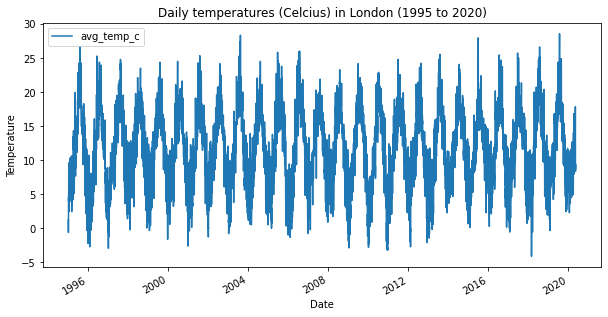

In [37]:
london = daily_temps[daily_temps.city == "London"]
london.plot(x = "date", y = "avg_temp_c")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Daily temperatures (Celcius) in London (1995 to 2020)")
plt.show()


# Temperature Extremes


1. How do I omit NAs from Agg?

In [38]:
london_monthly_range = london.groupby(["year", "month"]).avg_temp_c.agg([max, min]).reset_index()
london_monthly_range.head()


,year,month,max,min
0,1995,1,9.611111,-0.611111
1,1995,2,10.611111,3.888889
2,1995,3,12.055556,2.444444
3,1995,4,14.333333,5.111111
4,1995,5,19.944444,7.666667


2. How do I pivot this longer to have a row for max and min observation for each year & month?

In [39]:
london_monthly_range['day'] = 1
london_monthly_range['date'] =  pd.to_datetime(london_monthly_range[["year", "month", "day"]])
london_monthly_range.head()


,year,month,max,min,day,date
0,1995,1,9.611111,-0.611111,1,1995-01-01
1,1995,2,10.611111,3.888889,1,1995-02-01
2,1995,3,12.055556,2.444444,1,1995-03-01
3,1995,4,14.333333,5.111111,1,1995-04-01
4,1995,5,19.944444,7.666667,1,1995-05-01


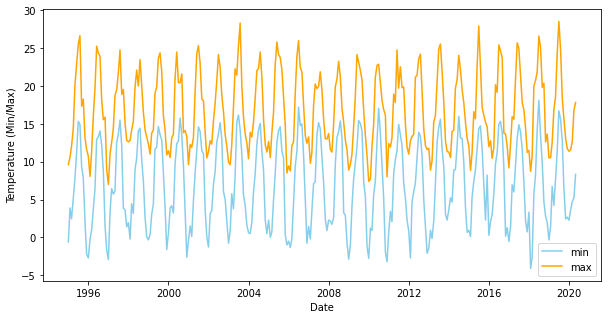

In [40]:
plt.plot("date", "min", data=london_monthly_range, color='skyblue')
plt.plot("date", "max", data=london_monthly_range, color='orange')

# london_monthly_range.plot(x = "date", y = "min")
# london_monthly_range.plot(x = "date", y = "max")

plt.xlabel("Date")
plt.ylabel("Temperature (Min/Max)")
plt.legend()
#plt.title("Daily temperatures (Celcius) in London (1995 to 2020)")
plt.show()